In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 84.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder

!pip install unidecode
!pip install openpyxl

import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time

import csv
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 10.6 MB/s eta 0:00:00


In [ ]:
train_path = '/content/drive/MyDrive/thesis/dataset/train_new.xlsx'
test_path = '/content/drive/MyDrive/thesis/dataset/test_new.xlsx'

In [ ]:
train = pd.read_excel(train_path)
train.head()

test = pd.read_excel(test_path)
test.head()



,text,classes
0,"সে যেটা করছে, সেটা ঠিক না।",fear
1,সব কিছু কর্তাদের ইচ্ছাতে হয়,surprise
2,"বর্তমানে সেনাবাহিনীর চাকরি না করে, ফুটপাতে বসে...",joy
3,টাকা পাইলে সব খানকীর ছেলেরা এমন কাজ করে !,joy
4,ম্যাজিস্ট্রেট মহোদয়ের দৃষ্টি আকর্ষণ করছি.... আ...,joy


In [ ]:
len(train.text.value_counts())

16821

In [ ]:
len(test.text.value_counts())

2382

In [ ]:
train.shape

(24654, 2)

In [ ]:
test.shape

(2382, 2)

In [ ]:
train.dropna()

,text,classes
0,সব বিদেশিকে লাথি দিয়ে বের করে দেন,fear
1,আপনি থাকলে সব সম্ভব। হোকনা শুরু যেখান থেকেই... :),sadness
2,দেবী নামের একটি ছবি কিছু দিন আগে সবাই অনেক প্র...,joy
3,তুকে সালাম ভাই।১০০%,sadness
4,"Thank You Sir.আপনার মত মানসিকতা হক সবার,এমনকি ...",sadness
...,...,...
24649,ছাগলের 19 নাম্বার বাচ্চার সাথে কিসের একমত? আমা...,joy
24650,মাস্টারমশাই বললেন তা যাই বল বাপু এ রাগ বড় ...,surprise
24651,জেভিপি'র সাবেক সাংসদ ডা. নালিন্দা জয়াতিসা গত র...,joy
24652,বুরা বেডি হাতিরজীল কি করে চেলের কোন খবর থাকে না,anger


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['encoded_classes'] = encoder.fit_transform(train['classes'])
train.head()

test['encoded_classes'] = encoder.fit_transform(test['classes'])
test.head()

,text,classes,encoded_classes
0,"সে যেটা করছে, সেটা ঠিক না।",fear,2
1,সব কিছু কর্তাদের ইচ্ছাতে হয়,surprise,5
2,"বর্তমানে সেনাবাহিনীর চাকরি না করে, ফুটপাতে বসে...",joy,3
3,টাকা পাইলে সব খানকীর ছেলেরা এমন কাজ করে !,joy,3
4,ম্যাজিস্ট্রেট মহোদয়ের দৃষ্টি আকর্ষণ করছি.... আ...,joy,3


In [ ]:
xtrain = train['text']
ytrain = train['encoded_classes']
xtest = test['text']
ytest = test['encoded_classes']

In [ ]:
xtrain = xtrain.astype(str).values.tolist()
xtest = xtest.astype(str).values.tolist()

In [ ]:
!pip install torch
import torch

In [ ]:
from torch.utils.data import TensorDataset

# **Roberta**

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-emotion")

In [ ]:
# Tokenize train reviews
encoded_text = [tokenizer.encode(sent, add_special_tokens=True) for sent in xtrain]

# Find the longest tokenized review
max_len = max([len(sent) for sent in encoded_text])
print('Max length: ', max_len)

Max length:  5752


In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    xtrain,
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus(
    xtest,
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(ytrain.values)


input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(ytest.values)


# Pytorch TensorDataset Instance
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

In [ ]:

from transformers import DataCollatorWithPadding,AutoModelForSequenceClassification, Trainer, TrainingArguments,AutoTokenizer,AutoModel,AutoConfig
from transformers.modeling_outputs import TokenClassifierOutput
import torch
import torch.nn as nn
import pandas as pd

In [ ]:
class CustomModel(nn.Module):
  def __init__(self,checkpoint,num_labels):
    super(CustomModel,self).__init__()
    self.num_labels = num_labels

    #Load Model with given checkpoint and extract its body
    self.model = model = AutoModel.from_pretrained(checkpoint,config=AutoConfig.from_pretrained(checkpoint, output_attentions=True,output_hidden_states=True))
    self.dropout = nn.Dropout(0.1)
    self.classifier = nn.Linear(768,num_labels) # load and initialize weights

  def forward(self, input_ids=None, attention_mask=None,labels=None):
    #Extract outputs from the body
    outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)

    #Add custom layers
    sequence_output = self.dropout(outputs[0]) #outputs[0]=last hidden state

    logits = self.classifier(sequence_output[:,0,:].view(-1,768)) # calculate losses

    loss = None
    if labels is not None:
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

    return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states,attentions=outputs.attentions)

In [ ]:
checkpoint="cardiffnlp/twitter-roberta-base-emotion"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=CustomModel(checkpoint=checkpoint,num_labels=6).to(device)

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-emotion were not used when initializing RobertaModel: ['classifier.out_proj.bias', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-emotion and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions a

In [ ]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

model.embeddings.word_embeddings.weight True
model.embeddings.position_embeddings.weight True
model.embeddings.token_type_embeddings.weight True
model.embeddings.LayerNorm.weight True
model.embeddings.LayerNorm.bias True
model.encoder.layer.0.attention.self.query.weight True
model.encoder.layer.0.attention.self.query.bias True
model.encoder.layer.0.attention.self.key.weight True
model.encoder.layer.0.attention.self.key.bias True
model.encoder.layer.0.attention.self.value.weight True
model.encoder.layer.0.attention.self.value.bias True
model.encoder.layer.0.attention.output.dense.weight True
model.encoder.layer.0.attention.output.dense.bias True
model.encoder.layer.0.attention.output.LayerNorm.weight True
model.encoder.layer.0.attention.output.LayerNorm.bias True
model.encoder.layer.0.intermediate.dense.weight True
model.encoder.layer.0.intermediate.dense.bias True
model.encoder.layer.0.output.dense.weight True
model.encoder.layer.0.output.dense.bias True
model.encoder.layer.0.output.La

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size=128;
dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)


dataloader_test = DataLoader(dataset_test,
                                   sampler=SequentialSampler(dataset_test),
                                   batch_size=batch_size)

In [ ]:
from transformers import AdamW,get_scheduler

optimizer = AdamW(model.parameters(), lr=2e-5)

num_epochs = 20
num_training_steps = num_epochs * len(dataloader_train)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)
print(num_training_steps)


3860


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from tqdm.auto import tqdm




for epoch in range(num_epochs):
  model.train()
  loss_train_total = 0
  progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
  for batch in progress_bar:
      batch = tuple(b.to(device) for b in batch)
      inputs = {'input_ids':      batch[0].to(device),
                'attention_mask': batch[1].to(device),
                'labels':         batch[2].to(device),
                }

      outputs = model(**inputs)
      loss = outputs[0]
      loss_train_total += loss.item()
      loss.backward()

      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()
      progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
  tqdm.write(f'\nEpoch {epoch}')
  loss_train_avg = loss_train_total/len(dataloader_train)
  tqdm.write(f'Training loss: {loss_train_avg}')

Epoch 0:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 0
Training loss: 1.6205381352666746


Epoch 1:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.1748642204956687


Epoch 2:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 2
Training loss: 1.1163170183260824


Epoch 3:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 3
Training loss: 1.0879235533234988


Epoch 4:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 4
Training loss: 1.0700356524843009


Epoch 5:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 5
Training loss: 1.0535803112958997


Epoch 6:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 6
Training loss: 1.036457663064176


Epoch 7:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 7
Training loss: 1.016158571823891


Epoch 8:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 8
Training loss: 0.9995874555617417


Epoch 9:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 9
Training loss: 0.9779775735627801


Epoch 10:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 10
Training loss: 0.9569226957355756


Epoch 11:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 11
Training loss: 0.9370506161852822


Epoch 12:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 12
Training loss: 0.9064286882395571


Epoch 13:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 13
Training loss: 0.8911234640704535


Epoch 14:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 14
Training loss: 0.8652414179218866


Epoch 15:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 15
Training loss: 0.8432035041596605


Epoch 16:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 16
Training loss: 0.8299399024464306


Epoch 17:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 17
Training loss: 0.8168921498437002


Epoch 18:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 18
Training loss: 0.8044107327807135


Epoch 19:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 19
Training loss: 0.7942089858450421


In [ ]:
def evaluate(dataloader_test):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_test:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_test)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [ ]:
val_loss, roberta_predictions, true_vals = evaluate(dataloader_test)
val_f1 = f1_score_func(roberta_predictions, true_vals)

In [ ]:
print('Val Loss = ', val_loss)
print('Val F1 = ', val_f1)

Val Loss =  1.29657024458835
Val F1 =  0.5414907296876699


In [ ]:
encoded_classes = encoder.classes_
predicted_category = [encoded_classes[np.argmax(x)] for x in roberta_predictions]
true_category = [encoded_classes[x] for x in true_vals]

In [ ]:
x = 0
for i in range(len(true_category)):
    if true_category[i] == predicted_category[i]:
        x += 1

print('Accuracy Score = ', x / len(true_category))

Accuracy Score =  0.5394626364399664


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))

<Axes: >

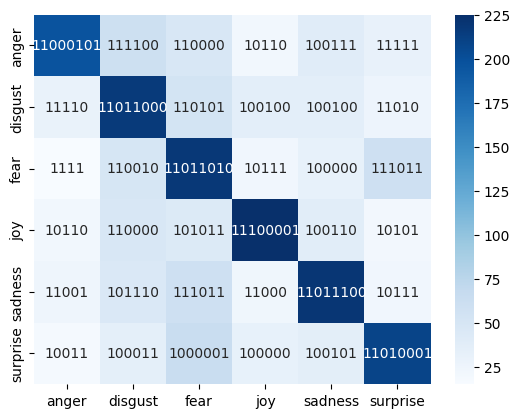

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(confusion_mat, index = list(encoded_classes),columns = list(encoded_classes))
sns.heatmap(df, annot=True,cmap="Blues", fmt='b')

Text(95.72222222222221, 0.5, 'Predicted Label')

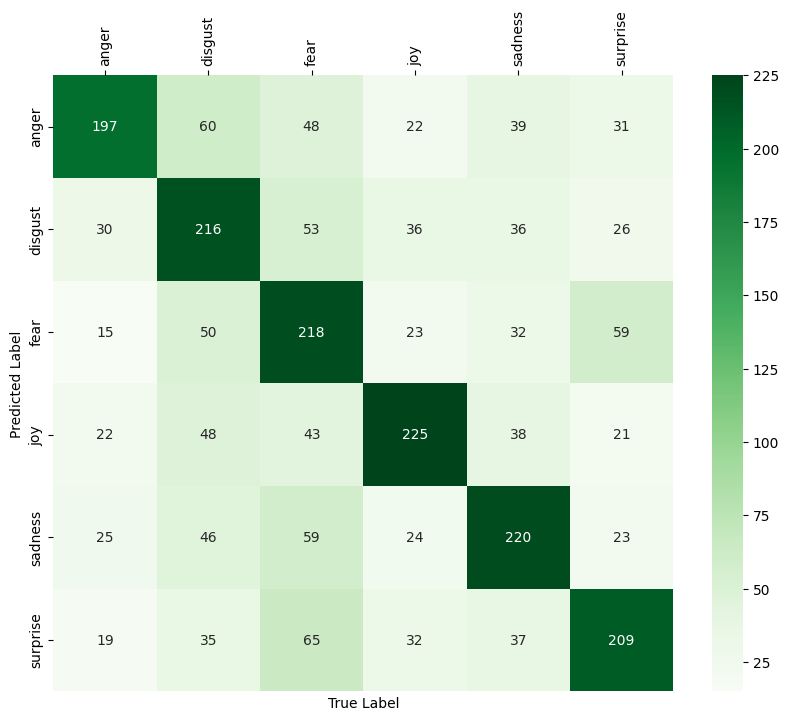

In [ ]:
import seaborn as sns
# return class label
# get confusion matrix
cm = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))
# covert it to dataframe for plotting
cm_df = pd.DataFrame(cm,
                     index = list(encoded_classes),
                     columns = list(encoded_classes))
# plot it
plt.figure(figsize = (10,8))
g = sns.heatmap(cm_df,annot=True,cmap="Greens", fmt='g')
g.xaxis.set_ticks_position("top")
g.tick_params(axis='x', rotation=90)
g.set_xlabel("True Label")
g.set_ylabel("Predicted Label")

In [ ]:
from sklearn.metrics import classification_report
report = pd.DataFrame(classification_report(y_true = true_category, y_pred = predicted_category, output_dict=True)).transpose()
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
anger,63.96,49.62,55.89,397.000000
disgust,47.47,54.41,50.70,397.000000
fear,44.86,54.91,49.38,397.000000
joy,62.15,56.68,59.29,397.000000
sadness,54.73,55.42,55.07,397.000000
surprise,56.64,52.64,54.57,397.000000
accuracy,53.95,53.95,53.95,0.539463
macro avg,54.97,53.95,54.15,2382.000000
weighted avg,54.97,53.95,54.15,2382.000000


# **mBERT**

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-multilingual-cased")

In [ ]:
# Tokenize train reviews
encoded_text = [tokenizer.encode(sent, add_special_tokens=True) for sent in xtrain]

# Find the longest tokenized review
max_len = max([len(sent) for sent in encoded_text])
print('Max length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (1459 > 512). Running this sequence through the model will result in indexing errors


Max length:  1459


In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    xtrain,
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus(
    xtest,
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(ytrain.values)


input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(ytest.values)


# Pytorch TensorDataset Instance
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

In [ ]:

from transformers import DataCollatorWithPadding,AutoModelForSequenceClassification, Trainer, TrainingArguments,AutoTokenizer,AutoModel,AutoConfig
from transformers.modeling_outputs import TokenClassifierOutput
import torch
import torch.nn as nn
import pandas as pd

In [ ]:
class CustomModel(nn.Module):
  def __init__(self,checkpoint,num_labels):
    super(CustomModel,self).__init__()
    self.num_labels = num_labels

    #Load Model with given checkpoint and extract its body
    self.model = model = AutoModel.from_pretrained(checkpoint,config=AutoConfig.from_pretrained(checkpoint, output_attentions=True,output_hidden_states=True))
    self.dropout = nn.Dropout(0.1)
    self.classifier = nn.Linear(768,num_labels) # load and initialize weights

  def forward(self, input_ids=None, attention_mask=None,labels=None):
    #Extract outputs from the body
    outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)

    #Add custom layers
    sequence_output = self.dropout(outputs[0]) #outputs[0]=last hidden state

    logits = self.classifier(sequence_output[:,0,:].view(-1,768)) # calculate losses

    loss = None
    if labels is not None:
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

    return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states,attentions=outputs.attentions)

In [ ]:
checkpoint="bert-base-multilingual-cased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=CustomModel(checkpoint=checkpoint,num_labels=6).to(device)

Some weights of the model checkpoint at bert-base-multilingual-cased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

model.embeddings.word_embeddings.weight True
model.embeddings.position_embeddings.weight True
model.embeddings.token_type_embeddings.weight True
model.embeddings.LayerNorm.weight True
model.embeddings.LayerNorm.bias True
model.encoder.layer.0.attention.self.query.weight True
model.encoder.layer.0.attention.self.query.bias True
model.encoder.layer.0.attention.self.key.weight True
model.encoder.layer.0.attention.self.key.bias True
model.encoder.layer.0.attention.self.value.weight True
model.encoder.layer.0.attention.self.value.bias True
model.encoder.layer.0.attention.output.dense.weight True
model.encoder.layer.0.attention.output.dense.bias True
model.encoder.layer.0.attention.output.LayerNorm.weight True
model.encoder.layer.0.attention.output.LayerNorm.bias True
model.encoder.layer.0.intermediate.dense.weight True
model.encoder.layer.0.intermediate.dense.bias True
model.encoder.layer.0.output.dense.weight True
model.encoder.layer.0.output.dense.bias True
model.encoder.layer.0.output.La

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size=128;
dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)


dataloader_test = DataLoader(dataset_test,
                                   sampler=SequentialSampler(dataset_test),
                                   batch_size=batch_size)

In [ ]:
from transformers import AdamW,get_scheduler

optimizer = AdamW(model.parameters(), lr=2e-5)

num_epochs = 20
num_training_steps = num_epochs * len(dataloader_train)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)
print(num_training_steps)


3860


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from tqdm.auto import tqdm




for epoch in range(num_epochs):
  model.train()
  loss_train_total = 0
  progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
  for batch in progress_bar:
      batch = tuple(b.to(device) for b in batch)
      inputs = {'input_ids':      batch[0].to(device),
                'attention_mask': batch[1].to(device),
                'labels':         batch[2].to(device),
                }

      outputs = model(**inputs)
      loss = outputs[0]
      loss_train_total += loss.item()
      loss.backward()

      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()
      progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
  tqdm.write(f'\nEpoch {epoch}')
  loss_train_avg = loss_train_total/len(dataloader_train)
  tqdm.write(f'Training loss: {loss_train_avg}')

Epoch 0:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 0
Training loss: 1.795977493024243


Epoch 1:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.3599086808417127


Epoch 2:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 2
Training loss: 1.155559008603269


Epoch 3:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 3
Training loss: 1.066671869915384


Epoch 4:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.9653436606412107


Epoch 5:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.849007893720439


Epoch 6:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 6
Training loss: 0.7414203842069201


Epoch 7:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 7
Training loss: 0.6406816069635085


Epoch 8:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 8
Training loss: 0.5525371927980314


Epoch 9:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 9
Training loss: 0.47748977795166053


Epoch 10:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 10
Training loss: 0.41164498455783866


Epoch 11:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 11
Training loss: 0.3672926018275128


Epoch 12:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 12
Training loss: 0.3244880898783244


Epoch 13:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 13
Training loss: 0.2899329356578965


Epoch 14:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 14
Training loss: 0.26442975963953247


Epoch 15:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 15
Training loss: 0.2372864765438391


Epoch 16:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 16
Training loss: 0.22041088269318942


Epoch 17:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 17
Training loss: 0.20422284567603174


Epoch 18:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 18
Training loss: 0.19317257751763794


Epoch 19:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 19
Training loss: 0.18239324663432768


In [ ]:
def evaluate(dataloader_test):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_test:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_test)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [ ]:
val_loss, mBERT_predictions, true_vals = evaluate(dataloader_test)
val_f1 = f1_score_func(mBERT_predictions, true_vals)

In [ ]:
print('Val Loss = ', val_loss)
print('Val F1 = ', val_f1)

Val Loss =  2.789630049153378
Val F1 =  0.5142964438428624


In [ ]:
encoded_classes = encoder.classes_
predicted_category = [encoded_classes[np.argmax(x)] for x in mBERT_predictions]
true_category = [encoded_classes[x] for x in true_vals]

In [ ]:
x = 0
for i in range(len(true_category)):
    if true_category[i] == predicted_category[i]:
        x += 1

print('Accuracy Score = ', x / len(true_category))

Accuracy Score =  0.5146935348446684


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))

<Axes: >

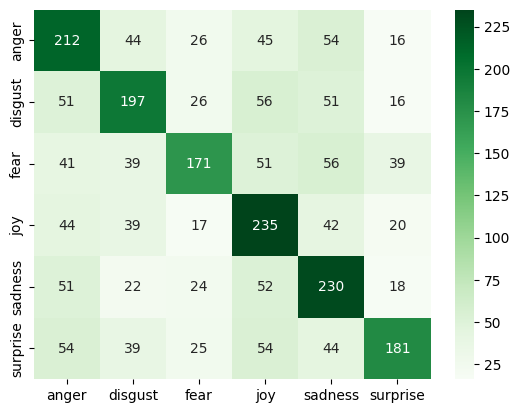

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(confusion_mat, index = list(encoded_classes),columns = list(encoded_classes))
sns.heatmap(df, annot=True,cmap="Greens", fmt='g')

Text(95.72222222222221, 0.5, 'Predicted Label')

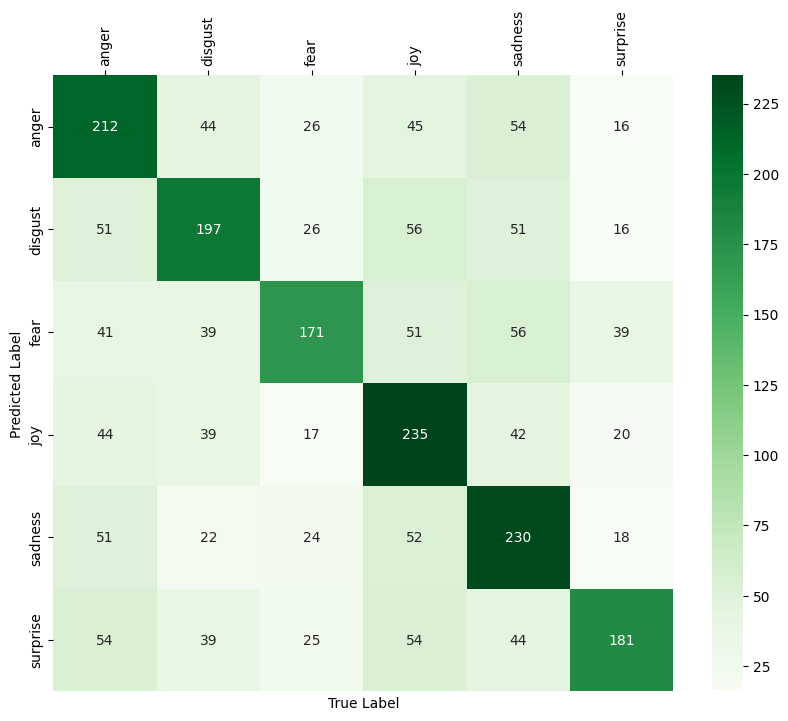

In [ ]:
import seaborn as sns
# return class label
# get confusion matrix
cm = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))
# covert it to dataframe for plotting
cm_df = pd.DataFrame(cm,
                     index = list(encoded_classes),
                     columns = list(encoded_classes))
# plot it
plt.figure(figsize = (10,8))
g = sns.heatmap(cm_df,annot=True,cmap="Greens", fmt='g')
g.xaxis.set_ticks_position("top")
g.tick_params(axis='x', rotation=90)
g.set_xlabel("True Label")
g.set_ylabel("Predicted Label")

In [ ]:
from sklearn.metrics import classification_report
report = pd.DataFrame(classification_report(y_true = true_category, y_pred = predicted_category, output_dict=True)).transpose()
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
anger,46.80,53.40,49.88,397.000000
disgust,51.84,49.62,50.71,397.000000
fear,59.17,43.07,49.85,397.000000
joy,47.67,59.19,52.81,397.000000
sadness,48.22,57.93,52.63,397.000000
surprise,62.41,45.59,52.69,397.000000
accuracy,51.47,51.47,51.47,0.514694
macro avg,52.68,51.47,51.43,2382.000000
weighted avg,52.68,51.47,51.43,2382.000000


# **distilBERT**

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [ ]:
# Tokenize train reviews
encoded_text = [tokenizer.encode(sent, add_special_tokens=True) for sent in xtrain]

# Find the longest tokenized review
max_len = max([len(sent) for sent in encoded_text])
print('Max length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (523 > 512). Running this sequence through the model will result in indexing errors


Max length:  2285


In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    xtrain,
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus(
    xtest,
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(ytrain.values)


input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(ytest.values)


# Pytorch TensorDataset Instance
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

In [ ]:

from transformers import DataCollatorWithPadding,AutoModelForSequenceClassification, Trainer, TrainingArguments,AutoTokenizer,AutoModel,AutoConfig
from transformers.modeling_outputs import TokenClassifierOutput
import torch
import torch.nn as nn
import pandas as pd

In [ ]:
class CustomModel(nn.Module):
  def __init__(self,checkpoint,num_labels):
    super(CustomModel,self).__init__()
    self.num_labels = num_labels

    #Load Model with given checkpoint and extract its body
    self.model = model = AutoModel.from_pretrained(checkpoint,config=AutoConfig.from_pretrained(checkpoint, output_attentions=True,output_hidden_states=True))
    self.dropout = nn.Dropout(0.1)
    self.classifier = nn.Linear(768,num_labels) # load and initialize weights

  def forward(self, input_ids=None, attention_mask=None,labels=None):
    #Extract outputs from the body
    outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)

    #Add custom layers
    sequence_output = self.dropout(outputs[0]) #outputs[0]=last hidden state

    logits = self.classifier(sequence_output[:,0,:].view(-1,768)) # calculate losses

    loss = None
    if labels is not None:
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

    return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states,attentions=outputs.attentions)

In [ ]:
checkpoint="distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=CustomModel(checkpoint=checkpoint,num_labels=6).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

model.embeddings.word_embeddings.weight True
model.embeddings.position_embeddings.weight True
model.embeddings.LayerNorm.weight True
model.embeddings.LayerNorm.bias True
model.transformer.layer.0.attention.q_lin.weight True
model.transformer.layer.0.attention.q_lin.bias True
model.transformer.layer.0.attention.k_lin.weight True
model.transformer.layer.0.attention.k_lin.bias True
model.transformer.layer.0.attention.v_lin.weight True
model.transformer.layer.0.attention.v_lin.bias True
model.transformer.layer.0.attention.out_lin.weight True
model.transformer.layer.0.attention.out_lin.bias True
model.transformer.layer.0.sa_layer_norm.weight True
model.transformer.layer.0.sa_layer_norm.bias True
model.transformer.layer.0.ffn.lin1.weight True
model.transformer.layer.0.ffn.lin1.bias True
model.transformer.layer.0.ffn.lin2.weight True
model.transformer.layer.0.ffn.lin2.bias True
model.transformer.layer.0.output_layer_norm.weight True
model.transformer.layer.0.output_layer_norm.bias True
model.

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size=128;
dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)


dataloader_test = DataLoader(dataset_test,
                                   sampler=SequentialSampler(dataset_test),
                                   batch_size=batch_size)

In [ ]:
from transformers import AdamW,get_scheduler

optimizer = AdamW(model.parameters(), lr=2e-5)

num_epochs = 20
num_training_steps = num_epochs * len(dataloader_train)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)
print(num_training_steps)


3860


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from tqdm.auto import tqdm




for epoch in range(num_epochs):
  model.train()
  loss_train_total = 0
  progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
  for batch in progress_bar:
      batch = tuple(b.to(device) for b in batch)
      inputs = {'input_ids':      batch[0].to(device),
                'attention_mask': batch[1].to(device),
                'labels':         batch[2].to(device),
                }

      outputs = model(**inputs)
      loss = outputs[0]
      loss_train_total += loss.item()
      loss.backward()

      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()
      progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
  tqdm.write(f'\nEpoch {epoch}')
  loss_train_avg = loss_train_total/len(dataloader_train)
  tqdm.write(f'Training loss: {loss_train_avg}')

Epoch 0:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 0
Training loss: 1.4954483484357133


Epoch 1:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.2309595849847546


Epoch 2:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 2
Training loss: 1.1835836626087446


Epoch 3:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 3
Training loss: 1.149789737296228


Epoch 4:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 4
Training loss: 1.1159596115813972


Epoch 5:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 5
Training loss: 1.080330730102223


Epoch 6:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 6
Training loss: 1.0327389416299335


Epoch 7:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 7
Training loss: 0.9799398230147486


Epoch 8:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 8
Training loss: 0.930163866497692


Epoch 9:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 9
Training loss: 0.8766987805539462


Epoch 10:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 10
Training loss: 0.8280985654944583


Epoch 11:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 11
Training loss: 0.7784439776227882


Epoch 12:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 12
Training loss: 0.7322266175956924


Epoch 13:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 13
Training loss: 0.6977203587176268


Epoch 14:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 14
Training loss: 0.6675319029259558


Epoch 15:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 15
Training loss: 0.6329908676715712


Epoch 16:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 16
Training loss: 0.610037765200274


Epoch 17:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 17
Training loss: 0.5962883141374341


Epoch 18:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 18
Training loss: 0.5856718817831938


Epoch 19:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 19
Training loss: 0.5704148908970887


In [ ]:
def evaluate(dataloader_test):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_test:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_test)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [ ]:
val_loss, distil_predictions, true_vals = evaluate(dataloader_test)
val_f1 = f1_score_func(distil_predictions, true_vals)

In [ ]:
print('Val Loss = ', val_loss)
print('Val F1 = ', val_f1)

Val Loss =  1.7096267060229653
Val F1 =  0.5207886339664459


In [ ]:
encoded_classes = encoder.classes_
predicted_category = [encoded_classes[np.argmax(x)] for x in distil_predictions]
true_category = [encoded_classes[x] for x in true_vals]

In [ ]:
x = 0
for i in range(len(true_category)):
    if true_category[i] == predicted_category[i]:
        x += 1

print('Accuracy Score = ', x / len(true_category))

Accuracy Score =  0.5205709487825357


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))

<Axes: >

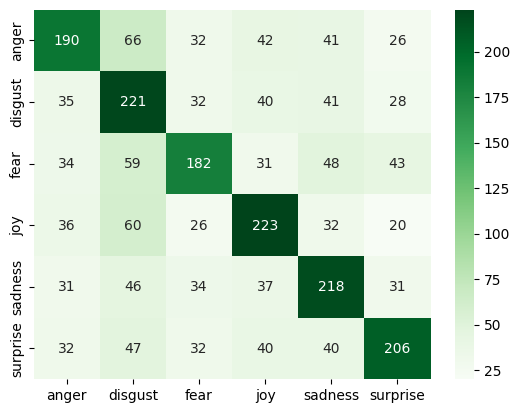

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(confusion_mat, index = list(encoded_classes),columns = list(encoded_classes))
sns.heatmap(df, annot=True,cmap="Greens", fmt='g')

Text(95.72222222222221, 0.5, 'Predicted Label')

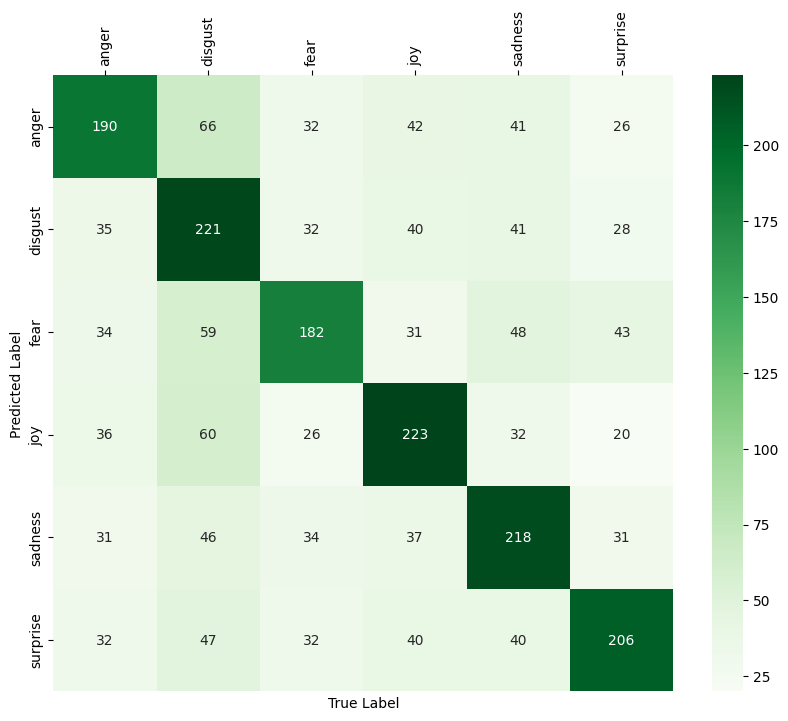

In [ ]:
import seaborn as sns
# return class label
# get confusion matrix
cm = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))
# covert it to dataframe for plotting
cm_df = pd.DataFrame(cm,
                     index = list(encoded_classes),
                     columns = list(encoded_classes))
# plot it
plt.figure(figsize = (10,8))
g = sns.heatmap(cm_df,annot=True,cmap="Greens", fmt='g')
g.xaxis.set_ticks_position("top")
g.tick_params(axis='x', rotation=90)
g.set_xlabel("True Label")
g.set_ylabel("Predicted Label")

In [ ]:
from sklearn.metrics import classification_report
report = pd.DataFrame(classification_report(y_true = true_category, y_pred = predicted_category, output_dict=True)).transpose()
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

,precision,recall,f1-score,support
anger,53.07,47.86,50.33,397.000000
disgust,44.29,55.67,49.33,397.000000
fear,53.85,45.84,49.52,397.000000
joy,54.00,56.17,55.06,397.000000
sadness,51.90,54.91,53.37,397.000000
surprise,58.19,51.89,54.86,397.000000
accuracy,52.06,52.06,52.06,0.520571
macro avg,52.55,52.06,52.08,2382.000000
weighted avg,52.55,52.06,52.08,2382.000000


# **BanglaBERT**

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("sagorsarker/bangla-bert-base")

In [ ]:
# Tokenize train reviews
encoded_text = [tokenizer.encode(sent, add_special_tokens=True) for sent in xtrain]

# Find the longest tokenized review
max_len = max([len(sent) for sent in encoded_text])
print('Max length: ', max_len)

Max length:  1096


In [ ]:
encoded_data_train = tokenizer.batch_encode_plus(
    xtrain,
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

encoded_data_test = tokenizer.batch_encode_plus(
    xtest,
    add_special_tokens=True,
    return_attention_mask=True,
    max_length=64,
    padding='max_length',
    truncation=True,
    return_tensors='pt'
)

In [ ]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(ytrain.values)


input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(ytest.values)


# Pytorch TensorDataset Instance
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_test = TensorDataset(input_ids_test, attention_masks_test, labels_test)

In [ ]:

from transformers import DataCollatorWithPadding,AutoModelForSequenceClassification, Trainer, TrainingArguments,AutoTokenizer,AutoModel,AutoConfig
from transformers.modeling_outputs import TokenClassifierOutput
import torch
import torch.nn as nn
import pandas as pd

In [ ]:
class CustomModel(nn.Module):
  def __init__(self,checkpoint,num_labels):
    super(CustomModel,self).__init__()
    self.num_labels = num_labels

    #Load Model with given checkpoint and extract its body
    self.model = model = AutoModel.from_pretrained(checkpoint,config=AutoConfig.from_pretrained(checkpoint, output_attentions=True,output_hidden_states=True))
    self.dropout = nn.Dropout(0.1)
    self.classifier = nn.Linear(768,num_labels) # load and initialize weights

  def forward(self, input_ids=None, attention_mask=None,labels=None):
    #Extract outputs from the body
    outputs = self.model(input_ids=input_ids, attention_mask=attention_mask)

    #Add custom layers
    sequence_output = self.dropout(outputs[0]) #outputs[0]=last hidden state

    logits = self.classifier(sequence_output[:,0,:].view(-1,768)) # calculate losses

    loss = None
    if labels is not None:
      loss_fct = nn.CrossEntropyLoss()
      loss = loss_fct(logits.view(-1, self.num_labels), labels.view(-1))

    return TokenClassifierOutput(loss=loss, logits=logits, hidden_states=outputs.hidden_states,attentions=outputs.attentions)

In [ ]:
checkpoint="sagorsarker/bangla-bert-base"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model=CustomModel(checkpoint=checkpoint,num_labels=6).to(device)

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
for name, param in model.named_parameters():
    print(name, param.requires_grad)

model.embeddings.word_embeddings.weight True
model.embeddings.position_embeddings.weight True
model.embeddings.token_type_embeddings.weight True
model.embeddings.LayerNorm.weight True
model.embeddings.LayerNorm.bias True
model.encoder.layer.0.attention.self.query.weight True
model.encoder.layer.0.attention.self.query.bias True
model.encoder.layer.0.attention.self.key.weight True
model.encoder.layer.0.attention.self.key.bias True
model.encoder.layer.0.attention.self.value.weight True
model.encoder.layer.0.attention.self.value.bias True
model.encoder.layer.0.attention.output.dense.weight True
model.encoder.layer.0.attention.output.dense.bias True
model.encoder.layer.0.attention.output.LayerNorm.weight True
model.encoder.layer.0.attention.output.LayerNorm.bias True
model.encoder.layer.0.intermediate.dense.weight True
model.encoder.layer.0.intermediate.dense.bias True
model.encoder.layer.0.output.dense.weight True
model.encoder.layer.0.output.dense.bias True
model.encoder.layer.0.output.La

In [ ]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler
batch_size=128;
dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=batch_size)


dataloader_test = DataLoader(dataset_test,
                                   sampler=SequentialSampler(dataset_test),
                                   batch_size=batch_size)

In [ ]:
from transformers import AdamW,get_scheduler

optimizer = AdamW(model.parameters(), lr=2e-5)

num_epochs = 20
num_training_steps = num_epochs * len(dataloader_train)
lr_scheduler = get_scheduler(
    "linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=num_training_steps,
)
print(num_training_steps)


3860


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from tqdm.auto import tqdm




for epoch in range(num_epochs):
  model.train()
  loss_train_total = 0
  progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
  for batch in progress_bar:
      batch = tuple(b.to(device) for b in batch)
      inputs = {'input_ids':      batch[0].to(device),
                'attention_mask': batch[1].to(device),
                'labels':         batch[2].to(device),
                }

      outputs = model(**inputs)
      loss = outputs[0]
      loss_train_total += loss.item()
      loss.backward()

      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()
      progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
  tqdm.write(f'\nEpoch {epoch}')
  loss_train_avg = loss_train_total/len(dataloader_train)
  tqdm.write(f'Training loss: {loss_train_avg}')

Epoch 0:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 0
Training loss: 1.6148504241142867


Epoch 1:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 1
Training loss: 1.1912143631920296


Epoch 2:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.9098425192536468


Epoch 3:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.6375953165978347


Epoch 4:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.43663901955352546


Epoch 5:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.30165299603358453


Epoch 6:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 6
Training loss: 0.21787450713506018


Epoch 7:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 7
Training loss: 0.15355200061835156


Epoch 8:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 8
Training loss: 0.12490347670535967


Epoch 9:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 9
Training loss: 0.09869819800393569


Epoch 10:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 10
Training loss: 0.07908567476419279


Epoch 11:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 11
Training loss: 0.06787724720574723


Epoch 12:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 12
Training loss: 0.05937473870659431


Epoch 13:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 13
Training loss: 0.051422707085048903


Epoch 14:   0%|          | 0/193 [00:00<?, ?it/s]


Epoch 14
Training loss: 0.04511350321395255


Epoch 15:   0%|          | 0/193 [00:00<?, ?it/s]

In [ ]:
def evaluate(dataloader_test):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_test:

        batch = tuple(b.to(device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    loss_val_avg = loss_val_total/len(dataloader_test)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [ ]:
val_loss, bangla_predictions, true_vals = evaluate(dataloader_test)
val_f1 = f1_score_func(bangla_predictions, true_vals)

In [ ]:
print('Val Loss = ', val_loss)
print('Val F1 = ', val_f1)

In [ ]:
encoded_classes = encoder.classes_
predicted_category = [encoded_classes[np.argmax(x)] for x in bangla_predictions]
true_category = [encoded_classes[x] for x in true_vals]

In [ ]:
x = 0
for i in range(len(true_category)):
    if true_category[i] == predicted_category[i]:
        x += 1

print('Accuracy Score = ', x / len(true_category))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(confusion_mat, index = list(encoded_classes),columns = list(encoded_classes))
sns.heatmap(df, annot=True,cmap="Greens", fmt='g')

In [ ]:
import seaborn as sns
# return class label
# get confusion matrix
cm = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))
# covert it to dataframe for plotting
cm_df = pd.DataFrame(cm,
                     index = list(encoded_classes),
                     columns = list(encoded_classes))
# plot it
plt.figure(figsize = (10,8))
g = sns.heatmap(cm_df,annot=True,cmap="Greens", fmt='g')
g.xaxis.set_ticks_position("top")
g.tick_params(axis='x', rotation=90)
g.set_xlabel("True Label")
g.set_ylabel("Predicted Label")

In [ ]:
from sklearn.metrics import classification_report
report = pd.DataFrame(classification_report(y_true = true_category, y_pred = predicted_category, output_dict=True)).transpose()
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report

# **Ensemble Model**

In [ ]:
# Perform majority voting with weights
ensemble_outputs = (0.2 * distil_predictions) + (0.2 * mBERT_predictions) + (0.2 * bangla_predictions) + (0.4 * roberta_predictions)
ensemble_predictions = torch.argmax(torch.from_numpy(ensemble_outputs), axis=1)

In [ ]:
# Get the final ensemble predictions
predictions = ensemble_predictions.tolist()

In [ ]:
# Print the predictions
print(predictions)

In [ ]:
encoded_classes = encoder.classes_
predicted_category = [encoded_classes[np.argmax(x)] for x in predictions]
true_category = [encoded_classes[x] for x in true_vals]

In [ ]:
x = 0
for i in range(len(true_category)):
    if true_category[i] == predicted_category[i]:
        x += 1

print('Accuracy Score = ', x / len(true_category))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.DataFrame(confusion_mat, index = list(encoded_classes),columns = list(encoded_classes))
sns.heatmap(df, annot=True,cmap="Greens", fmt='g')

In [ ]:
import seaborn as sns
# return class label
# get confusion matrix
cm = confusion_matrix(y_true = true_category, y_pred = predicted_category, labels=list(encoded_classes))
# covert it to dataframe for plotting
cm_df = pd.DataFrame(cm,
                     index = list(encoded_classes),
                     columns = list(encoded_classes))
# plot it
plt.figure(figsize = (10,8))
g = sns.heatmap(cm_df,annot=True,cmap="Greens", fmt='g')
g.xaxis.set_ticks_position("top")
g.tick_params(axis='x', rotation=90)
g.set_xlabel("True Label")
g.set_ylabel("Predicted Label")

In [ ]:
from sklearn.metrics import classification_report
report = pd.DataFrame(classification_report(y_true = true_category, y_pred = predicted_category, output_dict=True)).transpose()
report[['precision','recall','f1-score']]=report[['precision','recall','f1-score']].apply(lambda x: round(x*100,2))
report